In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# PROBLEM 1

Feature selection for practice

In [110]:
## Reading the dataset and cheacking the first five rows within the dataset.
df = pd.read_csv("train.csv", index_col = "Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
## Creating a new dataframe and extracting the variables and displaying the extracted data.
df1 = df.loc[:, ["GrLivArea","YearBuilt", "SalePrice"]]
df1

,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500
4,1717,1915,140000
5,2198,2000,250000
...,...,...,...
1456,1647,1999,175000
1457,2073,1978,210000
1458,2340,1941,266500


In [112]:
## Seperating the dataset into feature and target variable.
x = df1.loc[:, ["GrLivArea", "YearBuilt"]]
y = df1.loc[:, "SalePrice"]

In [113]:
## Displaying x which is the feature variable
x.head()

,GrLivArea,YearBuilt
Id,,
1,1710,2003
2,1262,1976
3,1786,2001
4,1717,1915
5,2198,2000


In [114]:
## Displaying y which is the target variable.
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [115]:
## Displaying the shape of both x and y variable.
x.shape, y.shape

((1460, 2), (1460,))

# PROBLEM 2

Estimation and evaluation by linear regression

In [116]:
## Devision of preprocessing/training data and verification data and displaying its shape.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1095, 2), (365, 2), (1095,), (365,))

In [117]:
## Pretreatement/Standardization
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
## Learning and estimation
reg = LinearRegression()
reg.fit(x_train, y_train)
y_preds = reg.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
print("MSE Linear Regression: {:,.3f}".format(mse))

print(f'R^2 ("coefficient of determination") Linear Regression: {r2_score(y_test, y_preds)}')

reg.score(x_test, y_test)

MSE Linear Regression: 1,760,370,866.367
R^2 ("coefficient of determination") Linear Regression: 0.7091720394884549


0.7091720394884549

In [119]:
##Linear Regression Method
def visual(y_preds, title):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
    ax1.scatter(x_test[:, 0], y_test)
    ax1.scatter(x_test[:, 0], y_preds, c="r")
    classes = ["Actual", "Predicted"]
    ax1.legend(labels=classes)
    ax1.set(title="Scatter plot house price based on GrLivArea", xlabel="GrLiveArea", ylabel="House Price")



    ax2.scatter(x_test[:, 1], y_test)
    ax2.scatter(x_test[:, 1], y_preds, c="orange")
    ax2.legend(labels=classes)
    ax2.set(title="Scatter plot house price based on year built", xlabel="GrLiveArea", ylabel="House Price")

    fig.suptitle(title, fontsize=16, fontweight="bold")


# PROBLEM 3

Comparison of methods

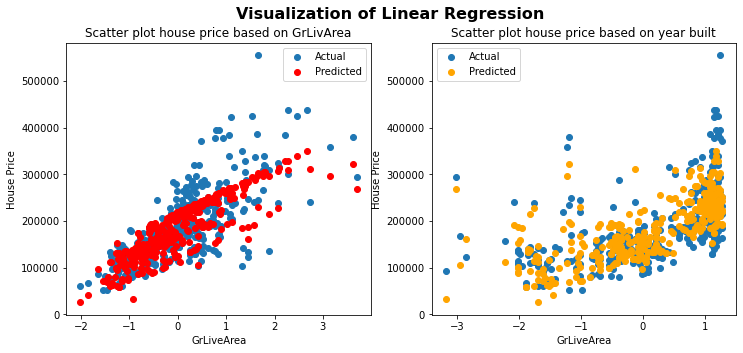

In [120]:
visual(y_preds, "Visualization of Linear Regression")

In [121]:
##SVM Method
svr_reg = SVR()
svr_reg.fit(x_train, y_train)
y_preds_svr = svr_reg.predict(x_test)

mse_svr = mean_squared_error(y_test, y_preds_svr)
print("MSE SVR: {:,.3f}".format(mse_svr))

print(f'R^2 score SVM: {r2_score(y_test, y_preds_svr)}')

MSE SVR: 6,620,333,149.563
R^2 score SVM: -0.09373429461924188


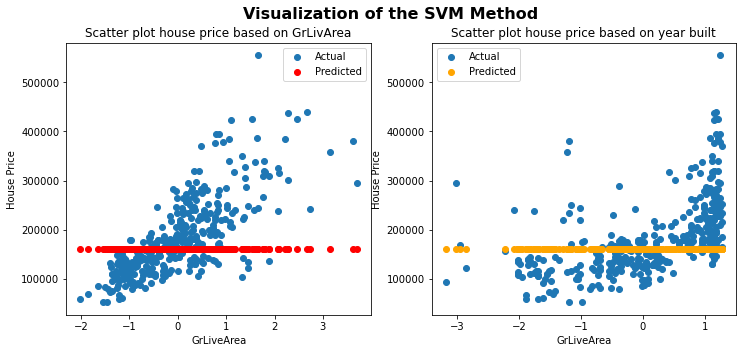

In [122]:
visual(y_preds_svr, "Visualization of the SVM Method")

In [123]:
##Random Forest method
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_preds_rf = rf_reg.predict(x_test)

mse_rf = mean_squared_error(y_test, y_preds_rf)
print("MSE Random Forest: {:,.3f}".format(mse_rf))

print(f'R^2 score Random Forest: {r2_score(y_test, y_preds_rf)}')

MSE Random Forest: 1,469,036,197.028
R^2 score Random Forest: 0.7573029585630328


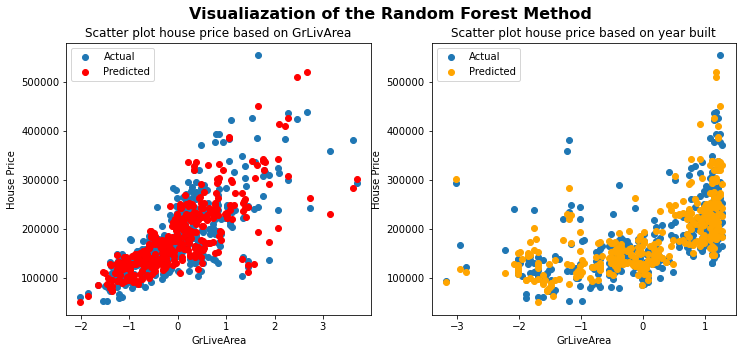

In [124]:
visual(y_preds_rf, "Visualiazation of the Random Forest Method")

In [125]:
##Decision Tree Method
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
y_preds_dt = dt_reg.predict(x_test)

mse_dt = mean_squared_error(y_test, y_preds_dt)
print("MSE Decision Tree: {:,.3f}".format(mse_dt))

print(f'R^2 score Decision Tree: {r2_score(y_test, y_preds_dt)}')

MSE Decision Tree: 2,781,789,506.151
R^2 score Decision Tree: 0.5404251546631451


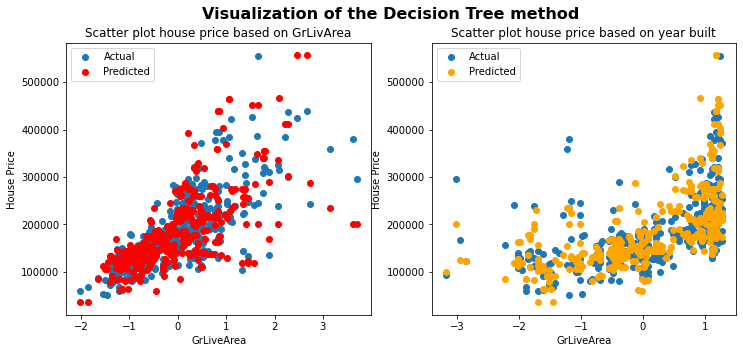

In [126]:
visual(y_preds_dt, "Visualization of the Decision Tree method")

|        Model       	|  Linear Regression 	|          SVM         	|    Decision Tree    	|    Random Forest   	|
|:------------------:	|:------------------:	|:--------------------:	|:-------------------:	|:------------------:	|
| Mean_squared_error 	|  2,494,650,770.237 	| 8,023,416,434.697    	|  4,045,302,902.318  	|  2,550,413,668.335 	|
|      r2_secor      	| 0.6641643168003966 	| -0.08013096345575699 	| 0.45541192372165173 	| 0.6566573858890875 	|

The mean_squared_error and the r2_score model are used and the LinearRegression method has a better index than the other methods. On the r2_score the LinearRegression method scored 65%, followed by the RandomForest method which scored 65%. Looking at the graphs the linear regression is welled prediected than the others.

# PROBLEM 4

(Advance assignment) Learning using other features

In [127]:
df.corr()["SalePrice"].sort_values(ascending=False).to_frame().head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [128]:
df2 = df.loc[:,["GrLivArea","OverallQual","YearBuilt","GarageCars","GarageArea", "SalePrice"]]
df2.head()

,GrLivArea,OverallQual,YearBuilt,GarageCars,GarageArea,SalePrice
Id,,,,,,
1,1710,7,2003,2,548,208500
2,1262,6,1976,2,460,181500
3,1786,7,2001,2,608,223500
4,1717,7,1915,3,642,140000
5,2198,8,2000,3,836,250000


In [129]:
x2 = df2.loc[:,["GrLivArea","OverallQual","YearBuilt","GarageCars","GarageArea"]]
y2 = df2.loc[:, "SalePrice"]

In [130]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((1095, 5), (365, 5), (1095,), (365,))

In [131]:
scaler = StandardScaler()
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)

In [137]:
def Regression_Models(x_train, x_test, y_train, y_test, features_list):
    method_list = ["LinearRegression", "SVM", "DecisionTree", "RandomForest"]
    lr = LinearRegression().fit(x_train, y_train).predict(x_test)
    svr = SVR().fit(x_train, y_train).predict(x_test)
    dt = DecisionTreeRegressor().fit(x_train, y_train).predict(x_test)
    rf = RandomForestRegressor().fit(x_train, y_train).predict(x_test)
    y_pred_list = [lr, svr, dt, rf]
    
    mse_list = [mean_squared_error(y_test, lr), mean_squared_error(y_test, svr), mean_squared_error(y_test, dt), mean_squared_error(y_test, rf)]
    df_mse.loc["MSE with 5 features"] = mse_list
    display(df_mse)
    for method, y_pred in zip(method_list, y_pred_list):
        fig, axes = plt.subplots(1, len(features_list), figsize=(6*len(features_list), 5), sharey=True)
        fig.suptitle(method,fontweight="bold", size=20)
        for i in range(len(features_list)):
            axes[i].scatter(x_test[:, i], y_test, color="green", label="test data")
            axes[i].scatter(x_test[:, i], y_pred, color="orange", label="pred ata")
            axes[i].set_title(features_list[i])
            axes[i].set_ylabel("SalePrice")
            axes[i].legend()
        plt.show()

In [138]:
method_list = ["LinearRegression", "SVM", "DecisionTree", "RandomForest"]

In [139]:
df_mse = pd.DataFrame(columns=method_list+["mean_squared_error"]).set_index("mean_squared_error")

In [140]:
features_list = ["GrLivArea","OverallQual","YearBuilt","GarageCars","GarageArea"]

,LinearRegression,SVM,DecisionTree,RandomForest
mean_squared_error,,,,
MSE with 5 features,2.318241e+09,6.867761e+09,3.944511e+09,2.428284e+09


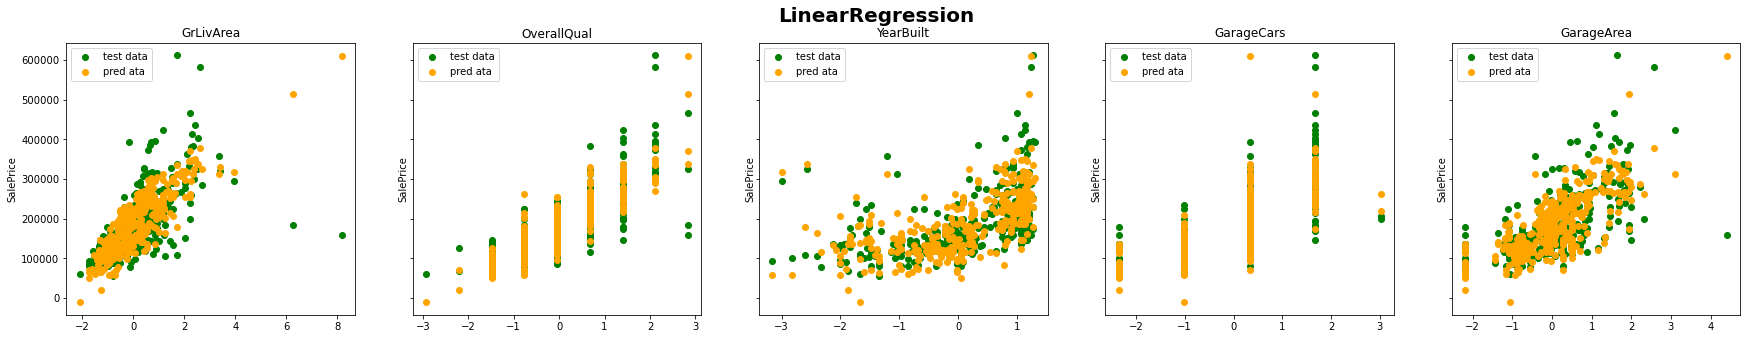

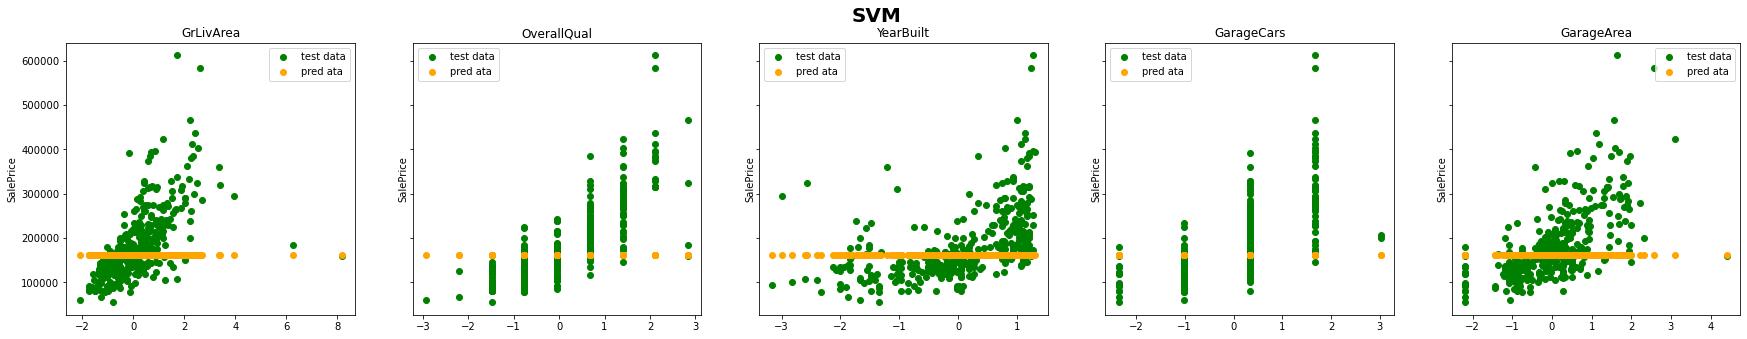

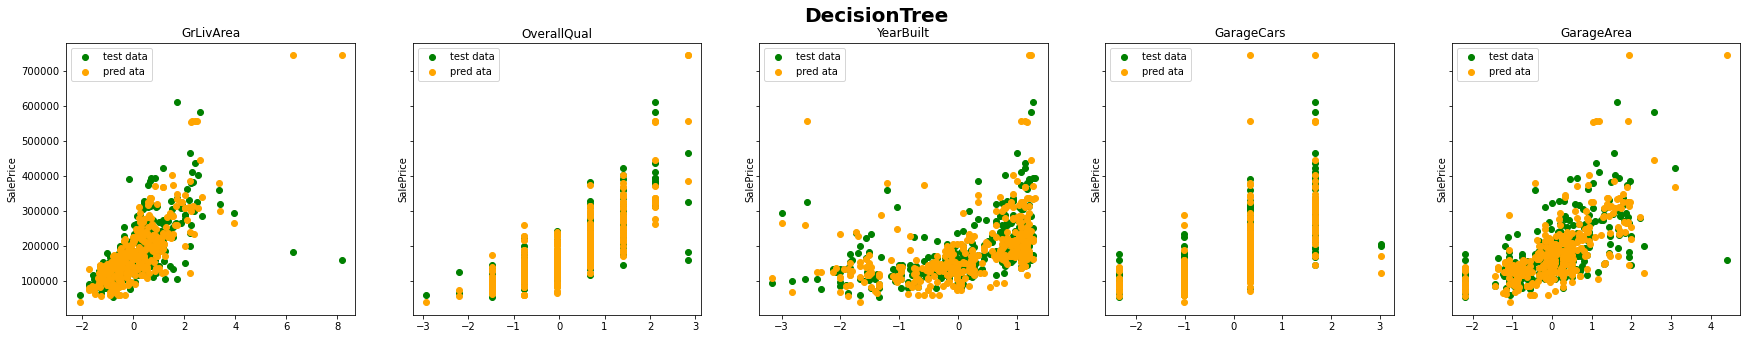

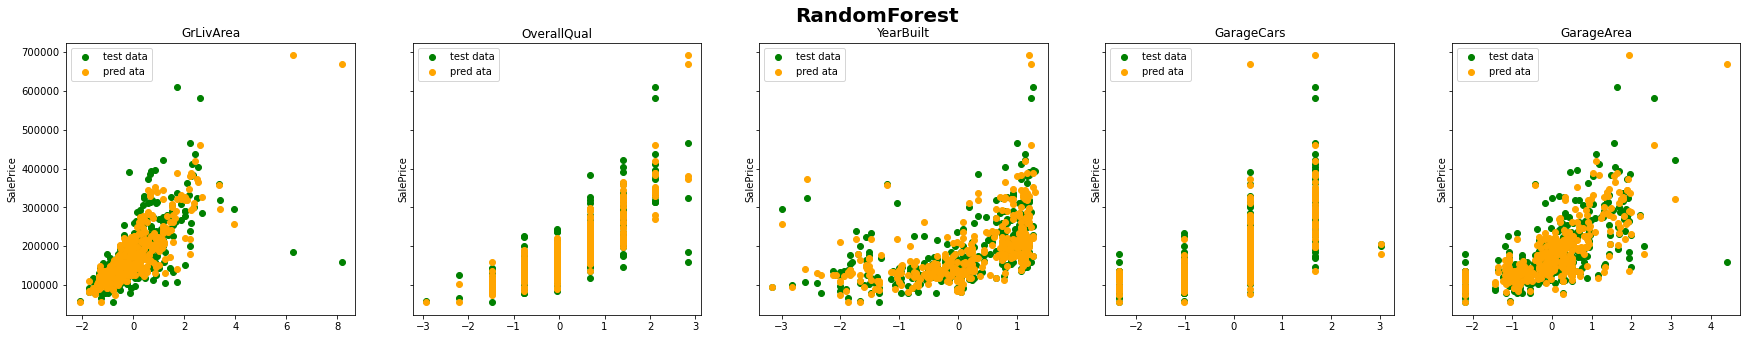

In [141]:
Regression_Models(x2_train, x2_test, y2_train, y2_test, features_list)